In [1]:
import kernel
import kernel_modified
import numpy as np
import fetch_data as fd
import alignment
import time
import MostFrequentFeatures as mff
import pylab as pb

In [2]:
categories = ['earn','acq']
numberOfTraining = [1,1]
numberOfTesting = [1,1]

trainData,trainLabels, testData,testLabel = fd.loadData(categories,numberOfTraining,numberOfTesting)



In [ ]:
n=3
l=0.5
cutoff = 500;
S = 500;

topFeatures, topFeatureScores = mff.mostFrequentFeatures(trainData,n,S)

t1=time.time()
#K = kernel.approximative_kernel(trainData,trainData,topFeatures,n,l)
t2=time.time()

t3=time.time()
K_mod = kernel_modified.approximative_kernel(trainData,trainData,topFeatures,n,l,cutoff)
t4=time.time()

print(t2-t1)
print(t4-t3)

done with features
done with occurance


  0%|                                                    | 0/2 [00:00<?, ?it/s]

In [5]:
print(alignment.alignment(K,K_mod))
for i in trainData:
    print(len(i))

0.99999531348
1840
874


In [28]:
categories = ['earn','acq']
numberOfTraining = [10,10]
numberOfTesting = [1,1]

trainData,trainLabels, testData,testLabel = fd.loadData(categories,numberOfTraining,numberOfTesting)

n=3
l=0.01
S = 500;

topFeatures, topFeatureScores = mff.mostFrequentFeatures(trainData,n,S)

loopVec = [5,50,100,150,200,250,300,400,500,600,700,800];

timeOld = [];
timeNew = [];

frobVal = [];

for cutoff in loopVec:
    t1=time.time()
    K = kernel.approximative_kernel(trainData,trainData,topFeatures,n,l);
    t2=time.time()

    t3=time.time()
    K_mod = kernel_modified.approximative_kernel(trainData,trainData,topFeatures,n,l,cutoff);
    t4=time.time()
    
    timeOld.append(t2-t1);
    timeNew.append(t4-t3);
    frobVal.append(alignment.alignment(K,K_mod));

done with features
done with occurance


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.42s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.41s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.44s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:49<00:00,  2.45s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:49<00:00,  2.48s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.41s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.41s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.41s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:49<00:00,  2.47s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.43s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.42s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:47<00:00,  2.40s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.42s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:47<00:00,  2.40s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.42s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:47<00:00,  2.40s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.42s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:48<00:00,  2.43s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:50<00:00,  2.51s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:51<00:00,  2.59s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:51<00:00,  2.59s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:52<00:00,  2.63s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:52<00:00,  2.63s/it]


Square kernel matrix generated


100%|██████████████████████████████████████████| 20/20 [00:50<00:00,  2.54s/it]


Square kernel matrix generated


In [29]:
timeRel = [];
for i,t in enumerate(timeOld):
    timeRel.append(t/timeNew[i]);

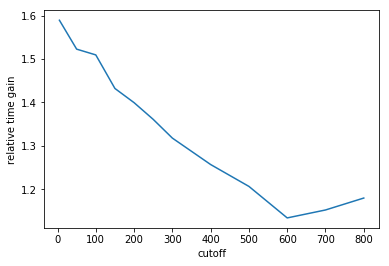

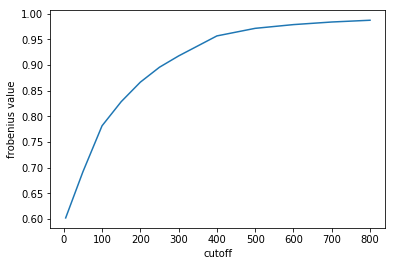

In [30]:
pb.plot(loopVec,timeRel);
pb.xlabel("cutoff")
pb.ylabel("relative time gain")
pb.show()

pb.figure()
pb.plot(loopVec,frobVal);
pb.xlabel("cutoff")
pb.ylabel("frobenius value")
pb.show()

In [16]:
print(loopVec[23])
print(frobVal[23])
print(timeNew[23])
print(timeOld[23])

500
0.88488092904
43.839754819869995
72.31045174598694
